In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv("dataset_ships.csv")
df

,length,displacement,type
0,313,71485,0
1,269,53752,1
2,245,42124,1
3,332,97875,0
4,312,75364,0
5,211,32157,1


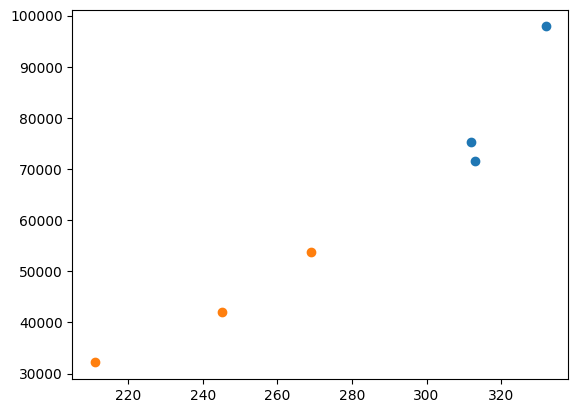

In [5]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,2].values

plt.figure()
plt.scatter(X[y==0][:,0], X[y==0][:,1])
plt.scatter(X[y==1][:,0], X[y==1][:,1])
plt.show()

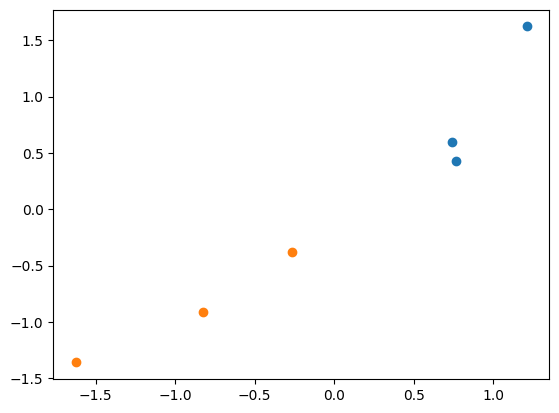

In [6]:
# z-transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

plt.figure()
plt.scatter(X_scaled[y==0][:,0], X_scaled[y==0][:,1])
plt.scatter(X_scaled[y==1][:,0], X_scaled[y==1][:,1])
plt.show()

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X_scaled)

pca.explained_variance_ratio_

array([0.98352646])

In [10]:
X_scaled

array([[ 0.76560164,  0.42502325],
       [-0.26561689, -0.38030547],
       [-0.82809973, -0.90838094],
       [ 1.21090055,  1.62350207],
       [ 0.74216485,  0.60118465],
       [-1.62495041, -1.36102355]])

In [12]:
X_scaled_compressed = pca.transform(X_scaled)
X_scaled_compressed

array([[ 0.84189893],
       [-0.45673608],
       [-1.22787726],
       [ 2.00422531],
       [ 0.94989154],
       [-2.11140244]])

In [13]:
# Anwendung Logistische Regresion
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_scaled_compressed,y)

In [22]:
x_new = [320,100000]  # new ship
# preprocessing 
x_new_scaled = scaler.transform([x_new])
x_new_scaled

array([[0.92965913, 1.72000709]])

In [23]:
x_new_scaled_compressed = pca.transform(x_new_scaled)
x_new_scaled_compressed

array([[1.87359695]])

In [24]:
clf.predict(x_ new_scaled_compressed)

array([0])